# Preparing network node and edge lists with Google Sheets
In this notebook, we'll use the data that you downloaded from  What Middletown Read (including the links saved using the Scraper extension and the version of the `book.csv` file that was cleaned up in OpenRefine) to prepare node and edge lists for constructing a network graph of books and readers.

This notebook walks you through preparing the node and edge lists using Google Sheets (you could do much the same thing in Microsoft Excel). The line between "working in a spreadsheet" and "writing code" can get to be kind of fuzzy at a certain point, and this worksheet will use a lot of spreadsheet formulas. (Though if you prefer to point, click and use commands like "Copy" and "Paste," that will get a lot of the work done, too.

## A - Before you start
You'll need to install the [Scraper](https://chrome.google.com/webstore/detail/scraper/mbigbapnjcgaffohmbkdlecaccepngjd) Chrome extension if you want to get the additional information for linking back to the WMR site in step 3.b, below.

## B - Think about what we're going to need
When we take a look at [Kumu's documentation](https://docs.kumu.io/guides/import.html#structure-your-data-for-kumu), it turns out that we need to be sure to have our data formatted in a particular way for the import to work correctly. Kumu isn't too fussy, but there are some minimum requirements:

1. A sheet with our "elements" (that is, our nodes), with at least one column, which needs to be named "Label." In the simplest cases, we could supply a "Label" and nothing else. As [the documentation](https://docs.kumu.io/faq/how-do-I-avoid-duplicating-data.html) notes, though, it can be helpful to supply an ID column to provide a unique identifier for each element. (Imagine the headaches that we'd face if there were two patrons named "Mary Smith" with no other value to use in distinguishing between them, for example.)
2. A sheet with our "connections" (that is, our edges), consisting of at least two columns: the first one needs to be labeled "From" and the second one needs to be labeled "To."

We can add more information than that, but those are the minimum requirements we need to meet.

## 1 - Uploading the data we've prepared to Google Drive
If you're using the records that I've been using in this example, you can find all the files you need in `rbs_digital_approaches_2021/data_class`.

If you downloaded different WMR records from the ones I've been using in this example, open a new browser tab and head to [Google Drive](https://drive.google.com), then navigate to the `rbs_digital_approaches_2021/data_my/` folder. Click the "+ New" button at the left, select "Folder upload" and upload your `wmr_full_search_results` folder.

## 2 - Preparing the WMR data

### 2.a - Create a new Google Sheet and import the WMR data into sheets
(In the screenshots that follow, I'm workin gin the `data_my` folder.) Create a new Google Sheet using the "+ New" button and selecting "Google Sheets." A blank Sheets document will open in a new tab. You can name your file by clicking on "Untitled" at the top of the window and entering a new name (I chose `wmr_data`). 

From the "File" menu, choose "Import."


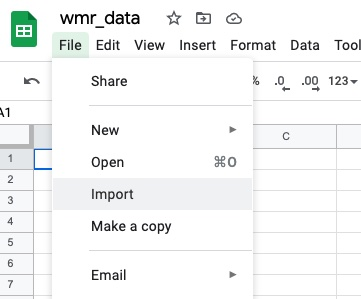

Then navigate to the folder of .csv files from WMR that you uploaded and select one of them (I'm starting with `book.csv`, which is not the original file that I downloaded from WMR, but the one I created in OpenRefine).

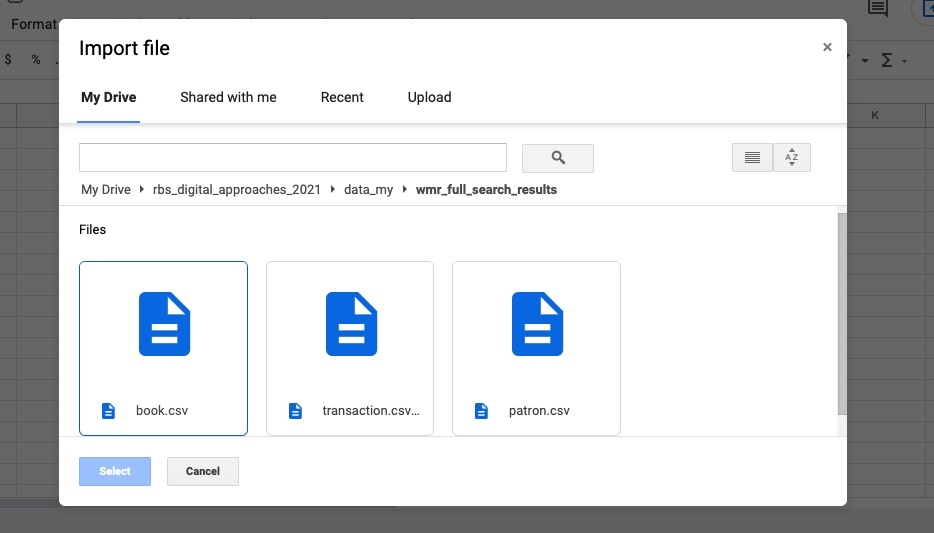

There are few options for how you want the import to behave. I don't think you can go particularly wrong with any of them, but I've opted to insert a new sheet. (This has the benefit of automatically naming the new sheet using the title of the .csv file I'm importing, which saves me the trouble of having to rename the sheet, myself).

I do recommend unchecking the box that offers to "Convert text to numbers, dates, and formulas" upon import. We don't really need to do that for this exercise, and I'd rather be the one to choose how to convert my data to a different format if and when the time comes.

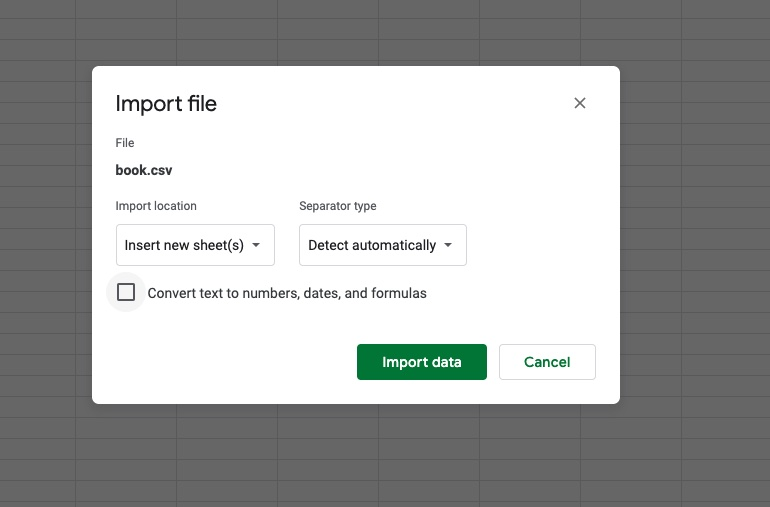

Repeat those steps for the other two sheets. 

**Note:** For the `patron.csv` and `transaction.csv` files (which are still in the same state they were when we downloaded them from WMR), you'll need to delete the first row.

 When you're done, your spreadsheet should look more or less like this:

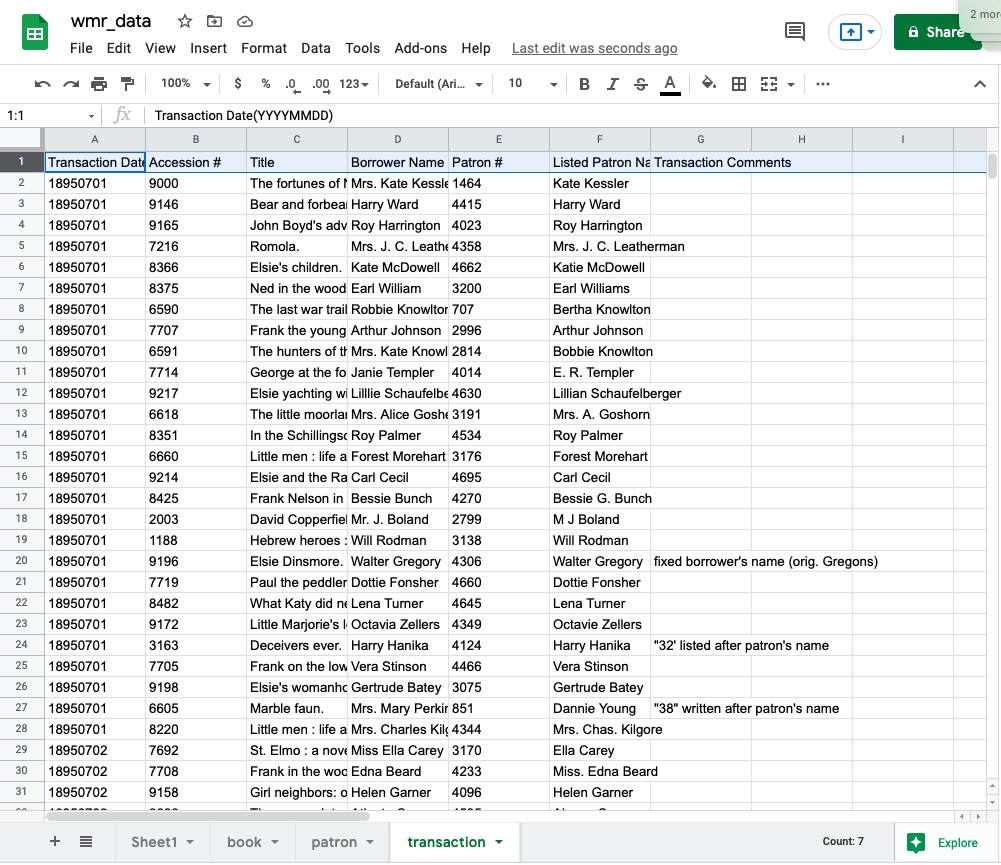

## 3 - Enriching the downloaded data by scraping some more information from WMR
In the last workbook, I asked you to leave the window with your WMR search results open. We'll go back to that window now to scrape some more information from the site.

The .csv files that WMR produces give us some information about the books and patrons in the transaction records, but not quite the information that we'd need if we wanted to link from our visualization back to the web site. The book records give us an accession number, for instance, but that accession number isn't the same as the identifier that's used to represent that book in the site's database.

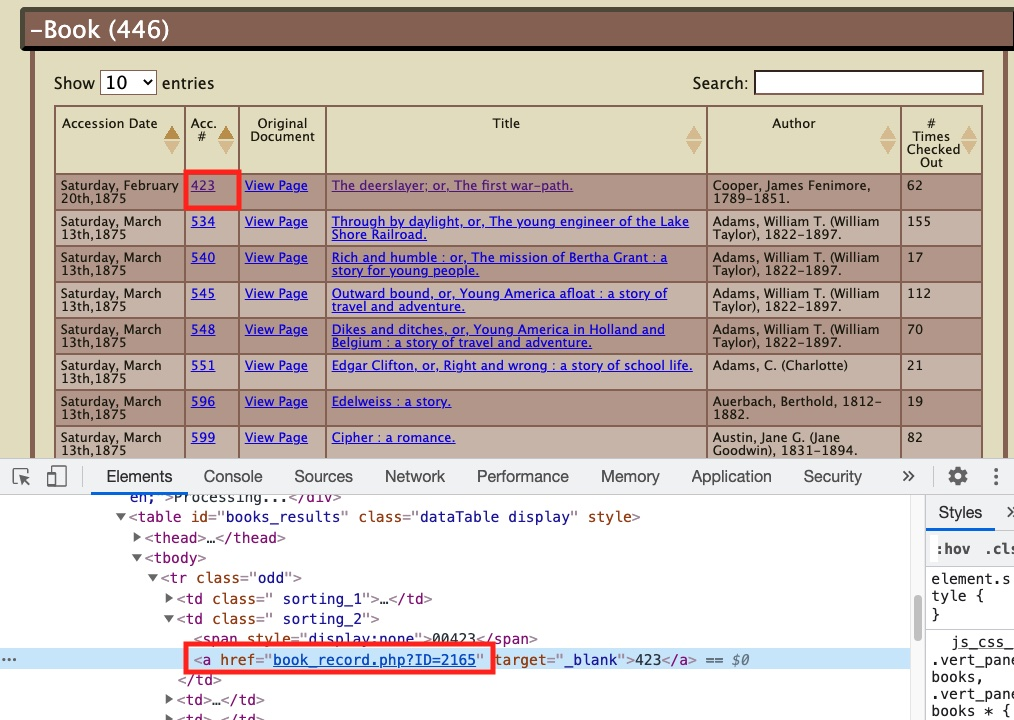

If we have those links, though, we can not only link back to the WMR site, we can also retrieve some information from the site that's not included in the .csv files we downloaded. For books, there may not be too much more that's illuminating. There is a lot of potentially interesting information about patrons, though, including marital status, race, occupation, and (broadly put) socioeconomic status. 

(**Note:** I'd encourage you to try out these next few steps to get a feel for how Scraper works—it can be a really useful tool for this kind of work. That said, to get the links yourself, you'll need to click through the paged results for books and patrons. That doesn't take long, but it is an extra step. If you're following along with this specific example, I've provided .csv files with this information in the `data_class` folder so you don't have to take the time to do all that.)

We can use the Scraper Chrome extension to get those links now, which will allow us to retrieve more information from WMR as we see fit. Be sure that the Scraper extension is installed, then right click on one of the links you'd like to save and click "Scrape similar..." to bring up the Scraper window.

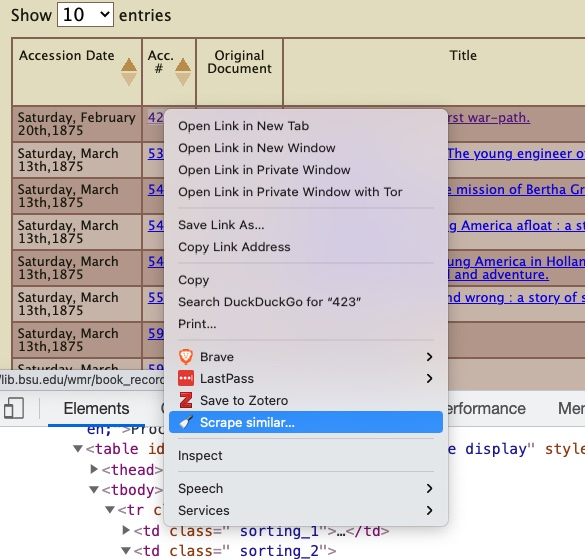

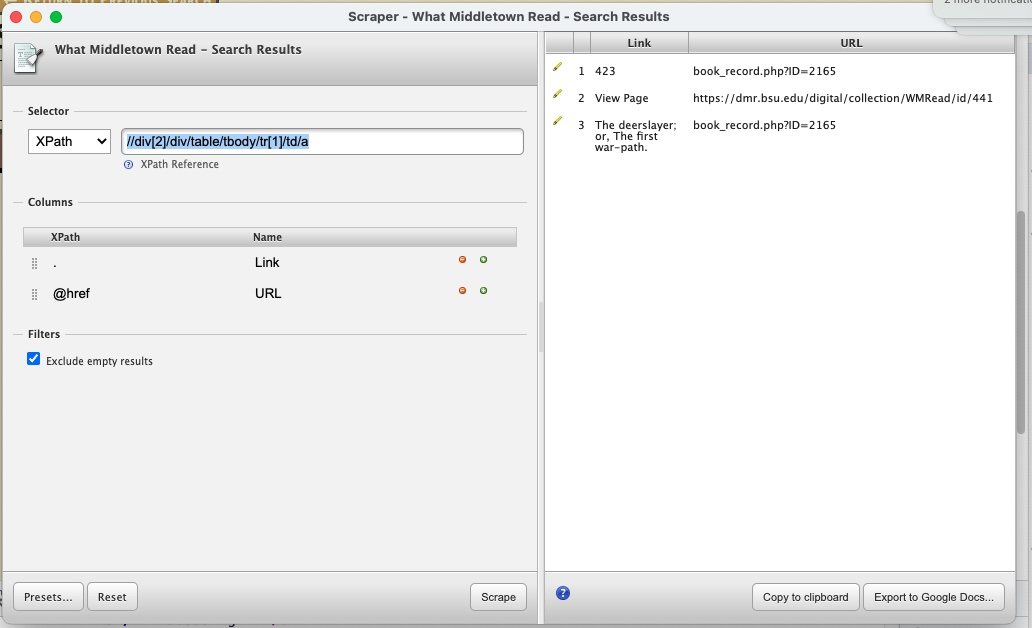

Scraper lets us select elements in a web page using either [XPath](https://developer.mozilla.org/en-US/docs/Web/XPath) (XML Path Language) or jQuery JavaScript selectors. Either will allow us  to select the elements that we want. (In this example, I'll use XPath because I think it shows a little more clearly the nested tree structure of the web page. Well, that and my JavaScript is rusty.) 

An indispensable aid for this kind of work is your browser's collection of "Developer Tools" (in Chrome and Chrome-based browsers, you'll find these under "View > Developer"). These tools allow you to see the underlying structure of the page as you figure out where the elements you're interested in are located.

In the "Selector" text field in the Scraper window, you provide the XPath of the element from which you want to start all of your selections to begin. Below, in the "Columns" section, you can enter a series of XPath expressions relative to that initial "Selector." The contents of those XPaths will appear—you guessed it—in columns.

When you select "Scrape similar...", Scraper will try to figure out the XPaths for the kinds of element you selected. These can give you a good starting point, but you'll almost always have to make adjustments to get all of the elements you want.

The next screenshot shows what your Scraper window should look like to get the Accession numbers and their accompanying links. I've provided the text of the XPaths in the cell below so you can copy and paste them, rather than having to re-type. (And also because they get truncated in the screenshot.)

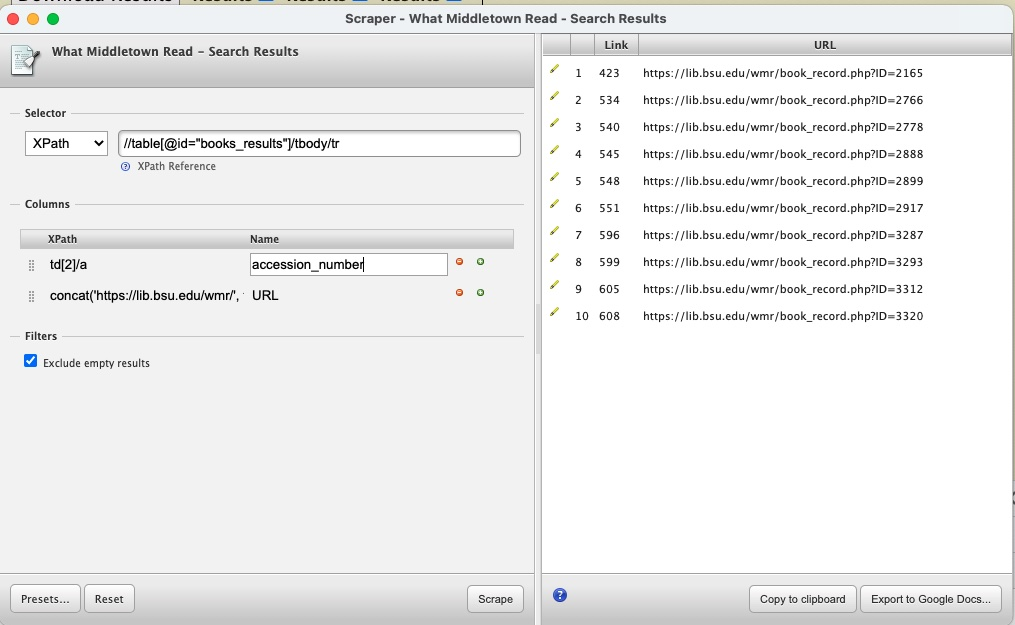

### 3.a - Getting links to books
In the "Selector" text field, you need the following XPath: 

>`//table[@id="books_results"]/tbody/tr`

The XPaths for the two columns are as follows: 

>`td[2]/a`
>
>`concat('https://lib.bsu.edu/wmr/', td[2]/a/@href)`

(In that second one, the XPath is `td[2]/a/@href`, but we're concatenating that value with a fixed string representing the first part of the URL.)


When you have the information you want, you can copy it to your clipboard and paste it into Google Sheets: I created a new sheet in `wmr_data` and pasted the first batch of links there. Note that you have to page through all of the results to get all of the links, so setting the number of rows to show in each view to something higher than 10 would be advisable. 

Each time you advance to the next batch of results, return to the Scraper window; click "Scrape" at the bottom of that window will refresh the scraped data, then you can copy the new batch of links to your clipboard and paste it into Google Sheets. (The header row will be duplicated each time, so you'll need to delete that.)

(Again, I've provided all these links in the `data_class` folder, so you don't actually have to work through all of this if you're using the same records I'm using.)

### 3.b - Getting links to patron records
The approach for getting links to connect borrowers to patron records is pretty much the same, we just need to change the XPaths we use. 

One interesting thing about the WMR records is that the name of the borrower is not always the same as the name attached to the patron record. (I'm not too familiar with these data, but it looks to me like wives might borrow under their husband's account, for instance, or children under their mother's or father's.) 

The data we downloaded from WMR gives the actual borrower's name, but also gives the patron number under which the loan was recorded, so we'll be able to link loan transactions to the accounts with which they're associated.

To get information from the "Borrowers" section, we just need to change the "Selector" value in Scraper to `//table[@id="patrons_results"]/tbody/tr`, and then grab the values of `td[1]` rather than `td[2]`. 

As with the books information, you'd need to copy the scraped data to your clipboard and paste it into a sheet in your `wmr_data` Google Sheet (or import the links that I placed in `data_class`). 

When you've paste in all of the links, your `wme_data` spreadsheet should look like this:

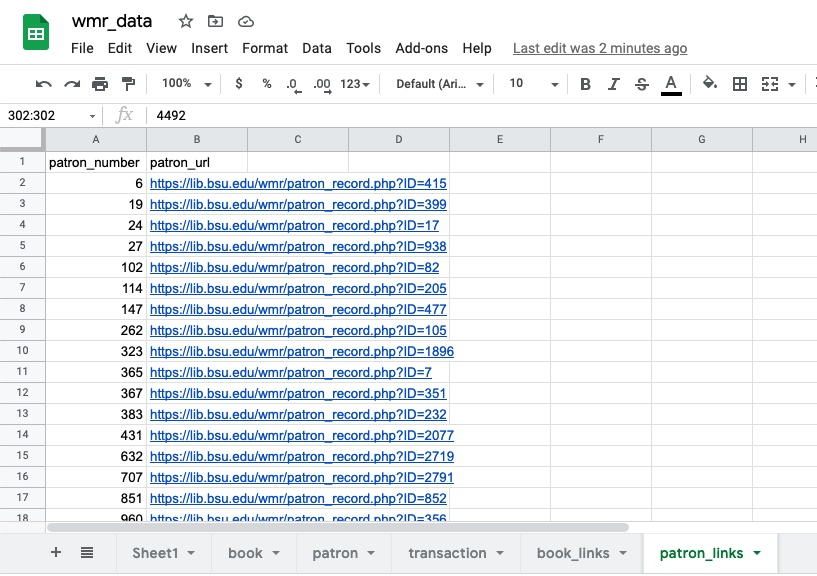

## 4 - Preparing our list of nodes
The fact that WMR gives us separate .csv files for books, patrons, and transactions makes it pretty straightforward to construct our tables of nodes and edges. Let's begin with the nodes, which we'll assemble in the currently blank "Sheet1" (or create a new sheet if you no longer have a blank "Sheet1.")

I renamed that sheet "elements" and provided some column headings based on the information I wanted to have available as extra fields when I sent this data to Kumu:

* ID: A unique identifier to avoid any problems with duplicate nodes
* Label: Kumu requires this column, and it seems like a sensible thing to have, anyway.
* Type: We'll have nodes of two different kinds: Books and Borrowers. We need a way of distinguishing them. 
* WMR Number: Even though I figured that I wouldn't be able to use WMR's accession numbers and patrin numbers as unique IDs (as I explain below), I still need to have those numbers available at least temporarily to get the links that I identified earlier.
* Link: A URL to link back to the original information at WMR.

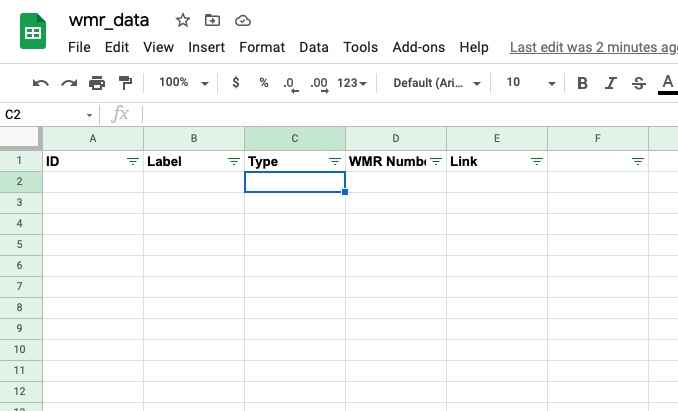

### 4.a - About IDs
Ordinarily, I would be inclined to use the Accession numbers and Patron numbers in the .csv files we downloaded from WMR as our IDs. The fact that "Borrowers" aren't necessarily the same as "Patrons," however, led me to a different approach.

Because multiple members of a household might all be associated with the same Patron record, that number doesn't serve as a unique identifier: patron number 1115, for example is associated with both Mr. A.J. Wilson and Mrs. A.J. Wilson. If I wanted to have the graph to capture individual borrowers from the same household separately, I couldn't use WMR's patron id, but would need to create unique ids of my own. If I wasn't going to use WMR's ids for patrons, it didn't really seem to make sense to use them for books, either.

>**Note:** There is definitely room to debate my approach to borrowers here. I didn't like the idea of merging records for wives and husbands or for children and parents, so creating unique ids for *borrowers* seemed preferable to using WMR's *patrons* as the entities in the network. But a quick check suggests that there may be some unintended consequences to this choice. The record for [patron number 1103](https://lib.bsu.edu/wmr/patron_record.php?ID=110), to take one example, gives the name A.J Phinney and gives his occupation as "Doctor." 
>
>Of the five transaction records connected with that patron number, however, two give the borrower's name as "Mrs. A.J. Phinney," two give "Mr. A.J. Phinney," and one gives "Dr. A.J. Phinney." In this case (and in several others, it looks like), my approach threatens to inflate the number of nodes with some spurious duplicates—"Mr. A.J. Phinney" and "Dr. A.J. Phinney" are presumably the same person. I'm not going to try to eliminate such "ghost" nodes in this brief example, but it's a problem that would need to be dealt with if I were really trying to represent these data in a network graph.

### 4.a - Books
In the screenshots below I'll use spreadsheet formulas to pull in values about the books.

I'll leave the ID column blank for the time being (I'll produce IDs later when I have both books and borrowers in the sheet), and will focus on constructing labels and getting other information that I'll want to have available as extra fields in the visualization I'll create at Kumu.

I still need a way of knowing where my labels are going to go, though, so I'll bring the accession numbers in to my WMR Numbers columnby entering the formula `=ARRAYFORMULA(book!$B2:B)` in cell D2.

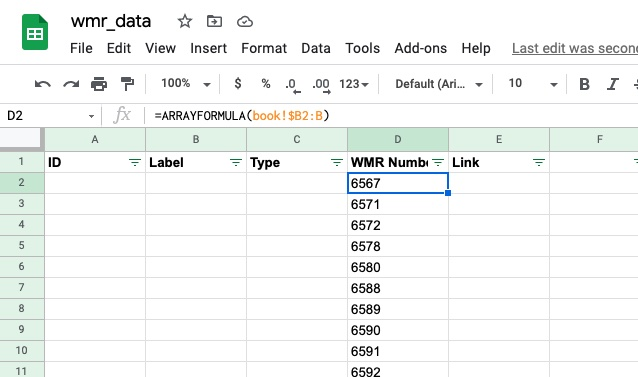

#### 4.a.i - Creating labels
For books, I wanted to construct a label that used both the author's name and the title. As we saw, though, the author names were kind of variable in our initial WMR download. While it's possible to clean those up in Google Sheets (and I had written a lengthy account of how to do it), I realized that OpenRefine was just a better tool for the task, so that's why we went to work on the `book.csv` file in OpenRefine before we made it to this step.

With the authors' names taken care of in OpenRefine, it's pretty simple to put the labels together. Back in the "elements" sheet, in cell B2, I entered the formula 

>`=book1$E2&". "&book!$C2`

Then I copied that formula and pasted it in the other rows in column B on that sheet. (`ARRAYFORMULA` would have been easier, but that created cells with just periods in them corresponding to every empty row in the `book` sheet.) 

And that was that for the labels.


#### 4.a.ii - Adding a Type
Our network is going to have two different kinds of entities: books and borrowers. It's probably best to add a new column for the type of entity we're dealing with now while we're still dealing with just books. If we wait until we've brough in information about borrowers, we'll have to scroll through our list to figure out where the books end and the borrowers begin.

I labeled volumn C "Type," then entered "Book" in cell C2, copied it, and pasted that value into the rest of the cells in C2 for all rows that had values.

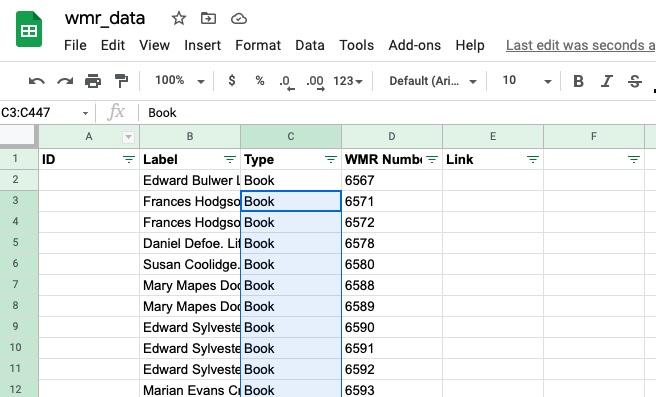

#### 4.a.iii - Adding links
I used the `VLOOKUP` function to retrieve the link to each book from the sheet with the book links using the number in the WMR column. For reasons that aren't entirely clear to me, I first had to set the format of both of those columns to "Plain text." In each sheet, I highlighted the column with the WMR numbers and selected "Number > Plain text" from the Format menu.

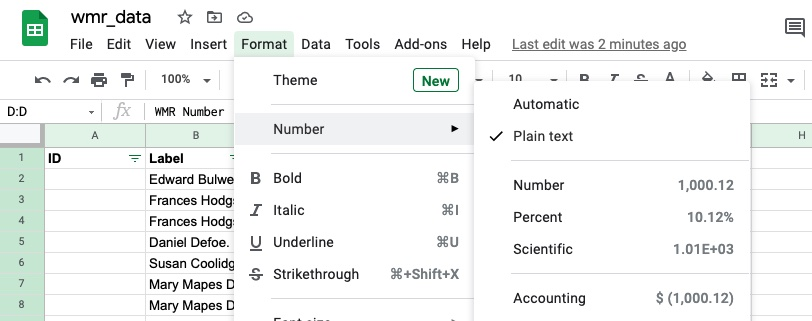

With that done, I entered the formula `=VLOOKUP(D2,2021_s2_wmr_book_links!A:D,4,FALSE)` in cell E2 and pasted that formula in the remaining cells in that column.

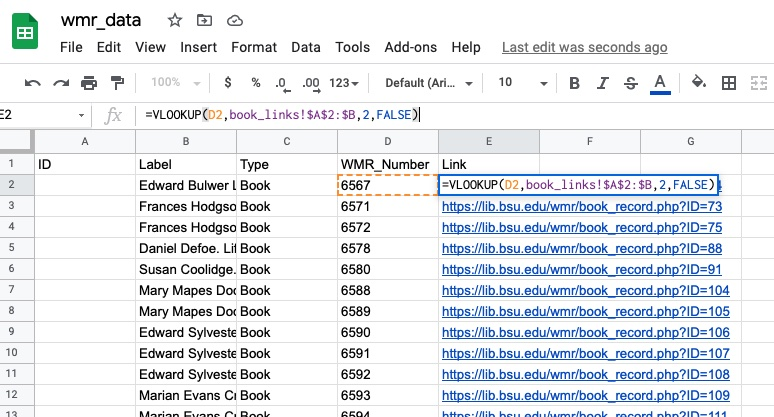

#### 4.a.iv - Freezing book values
At this point, all of the values in the `elements` sheet were still dynamic: any changes to the `book` sheet would be reflected in the `elements` sheet. A more serious issue, though, was that the values created by `ARRAYFORMULA` that I used to get the WMR numbers would be overwritten if I tried to bring in borrower ids with a new array formula.

To fix both issues, I copied all of the rows with data in the `elements` sheet then right clicked and selected "Paste special > Paste values only." That meant that the contents of those rows were stable text, not affected by changes elsewhere in the file.

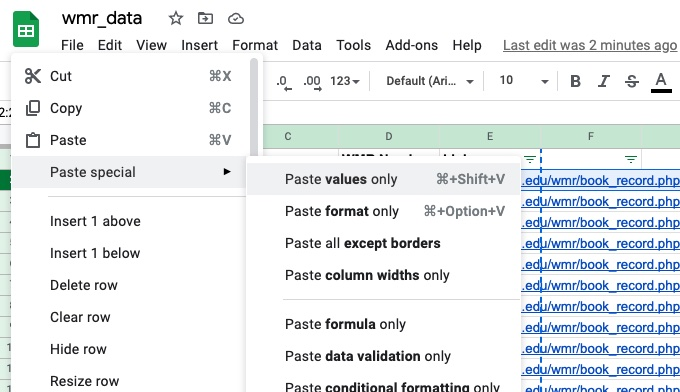

### 4.b - Borrowers
Adding borrowers to the `elements` sheet required a little bit of manipulation, as "Borrowers" aren't necessarily the same as "Patrons" in the WMR data (since different members of the same household might all be borrowing under the same patron id).

Rather than bringing in information from the `patron` sheet, then, I opted to get that information from the `transaction` sheet.  In the first blank row in the Label column, I entered the formula `=UNIQUE(transaction!$D2:E)`. That brought in all unique combinations of patron ids and borrower names from the  `transaction` sheet. 

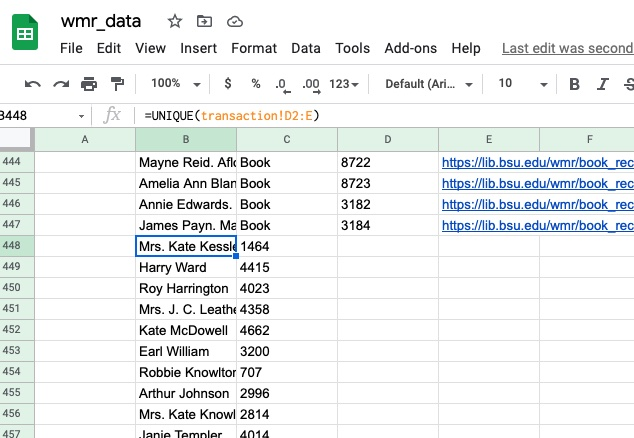

In order to be able to cut the cells with the patron numbers and move them over one column, as well as enter "Borrower" in the Type column, I first had to freeze the values of the rows I had just brought in with `UNIQUE` by copying them and pasting their values in place.

After ensuring that the formats of both the WMR Number column in the `elements` sheet and the Patron number column in `2021_s2_wmr_patron_links` were set to "Plain text," I performed another `VLOOKUP` to get the links back to the patron records at WMR (`=VLOOKUP(D448,2021_s2_wmr_patron_links!A:C,3,False`).

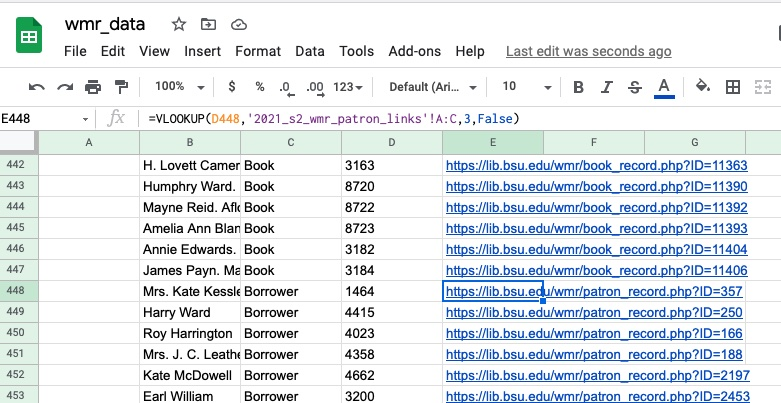

### 4.c - Generating ids
We now have all of the information for our node list. The only thing left to do is to add unique IDs in column A. I made note of how many rows were in my sheet then entered the formula `=SEQUENCE(1049)` in cell A2, which fills in 1,049 rows in sequential order. (I had 1,050 rows, but needed to subtract one for the header row.)

With this done, I selected the entire sheet and then pasted the values in place ("Paste special > Paste values") to make sure nothing could get changed inadvertently. 

### 4.d - Retrieving more information about Borrowers from WMR (in theory)
Since we have the links to Book and Patron records, we can retrieve some of the information from the site that's not included in the .csv files we downloaded. I'm especially interested in some of the demographic information about borrowers: were "low white collar" readers reading the same books as "blue collar workers"? How about Black and white readers? Women and men?

Google Sheets allows us to retrieve information using a URL and an XPath—the same information we used to scrape links from WMR in the first place.

The XPaths for scraping this information from WMR are a little unwieldy, but they're simple enough: we can use the `title` attribute to get just the `span` elements we want.

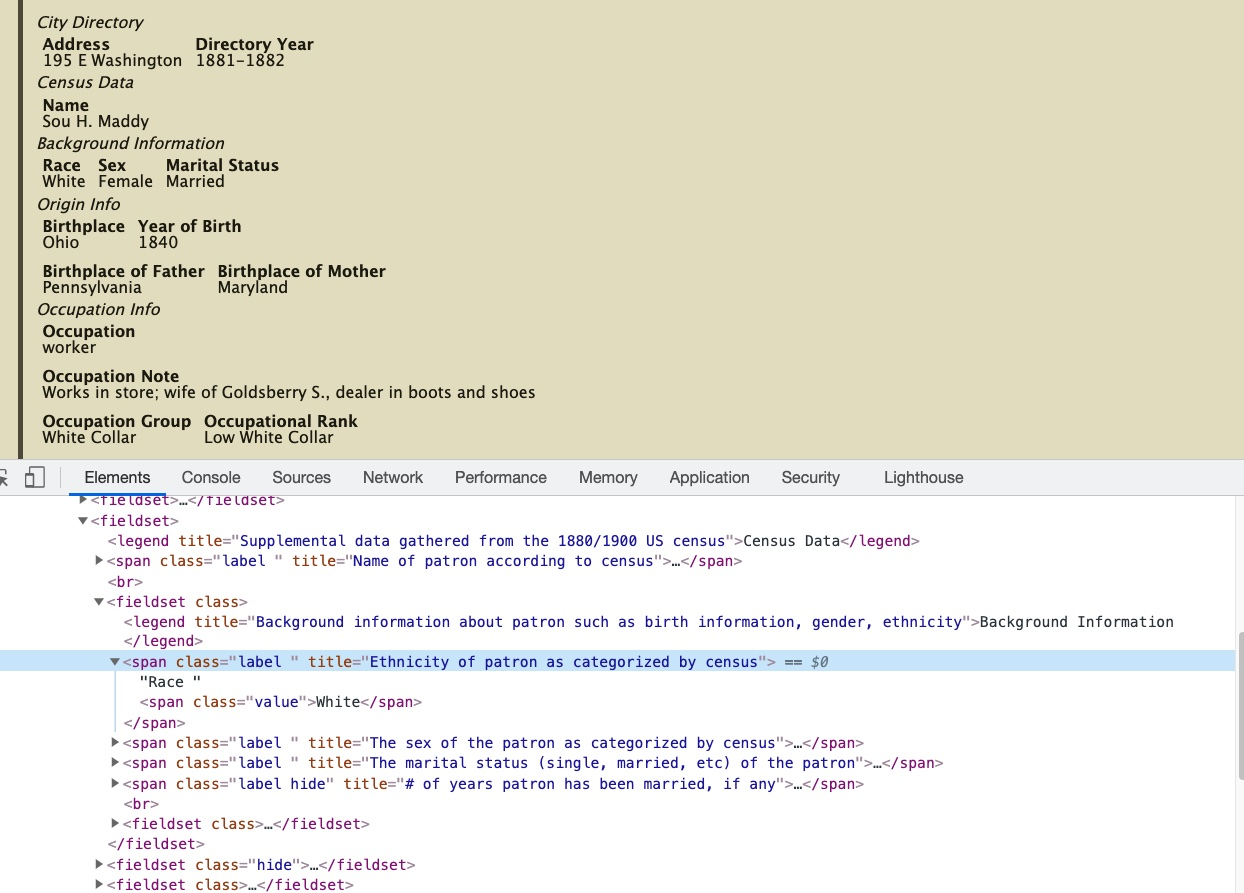

I added column labels for the information I was interested in, then scrolled down to the first "Borrower" row and entered the following formulas:

  In column F: `=IMPORTXML(E448, "//span[@title='Ethnicity of patron as categorized by census']/span")`

  In column G: `=IMPORTXML(E448, "//span[@title='The sex of the patron as categorized by census']/span")`

  In column H: `=IMPORTXML(E448, "//span[@title='The marital status (single, married, etc) of the patron']/span")`

  In column I: `=IMPORTXML(E448, "//span[@title='Inferred occupational rank based on type of job']/span")`

This works, but Google Sheets isn't the best tool for scraping a lot of data: it bogs down as the number of requests goes up, and doesn't really give you any way of handling problems along the way. 

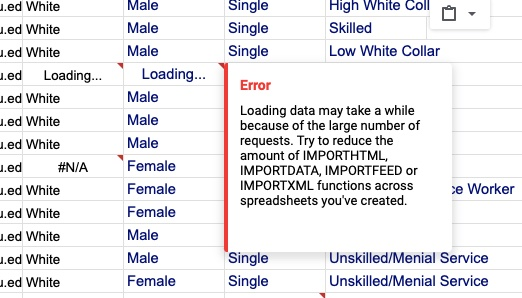

If you were able to paste a few rows at a time spaced out over a longer period, you could probably make this work, but we're dealing with several hundred rows. I present this here for illustration purposes, but if you wanted to retrieve lots of data like this from WMR (or any other site), you'd be better served using a different method—this is something that's much easier to do satisfactorily in code. 

Ultimately, I deleted those columns from the spreadsheet.

## 5 - Preparing the list of edges
The `transaction` sheet provides all the information needed to construct the edge list, but the fact that I just created arbitrary IDs for the books and borrowers complicates the task just slightly. We'll need to use information from the `transaction` sheet to look up the arbitrary sequential IDs in the `elements` sheet.

I decided to take this on in two steps. First, I copied information from each row of the `transaction` sheet in the form that it appeared there. Then I used that information to look up the unique ID in the elements list using a combination of the `INDEX` and `MATCH` functions.

First, I created a new sheet and called it "connections." In cell A2 I entered the formula `=ARRAYFORMULA(transaction!D2:D)`. In cell B2 I entered the formula `=ARRAYFORMULA(transaction!B2:B)`.

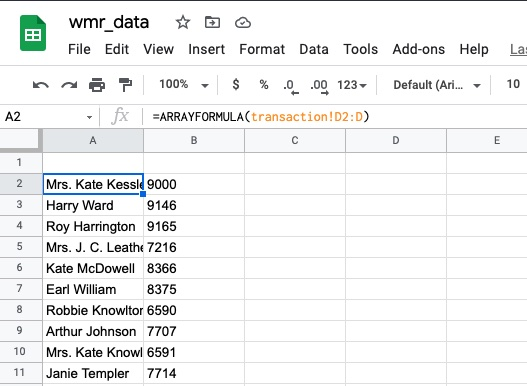

With those values in place, I then entered the following formula in cell C2 and copied and pasted that formula in the remaining rows in that column:

>`=INDEX(elements!$A:$B,MATCH($A2,elements!$B$2:B,0),MATCH("ID",elements!$A$1:$B$1,0))`

That's kind of a complicated formula. The basic syntax of the `INDEX` formula has three elements: an array of rows and columns; a row number in that array; and a column number in that array. 

What this formula is doing is using the `MATCH` formula to supply the row and column numbers. In this case, the row number given is the result of finding the `MATCH` for cell A2 in column D of the `elements` sheet. The column number, in turn, is provided by matching the string "ID" in the row A of the `elements` sheet.

I used the same approach in column D, but with this formula:

>`=INDEX(elements!$A:$D,MATCH($B2,elements!$D$2:$D,0),MATCH("ID",elements!$A$1:$D$1,0))`

(Incidentally, if you haven't spent much time working with spreadsheets, you may not have encountered the dollar signs as they're being used here: those indicate that a value should stay the same. Otherwise, if you copy a formula that refers to A1:D1 and paste it on the next row down, A1:D1 would become A2:D2, then A3:D3, and so on.)


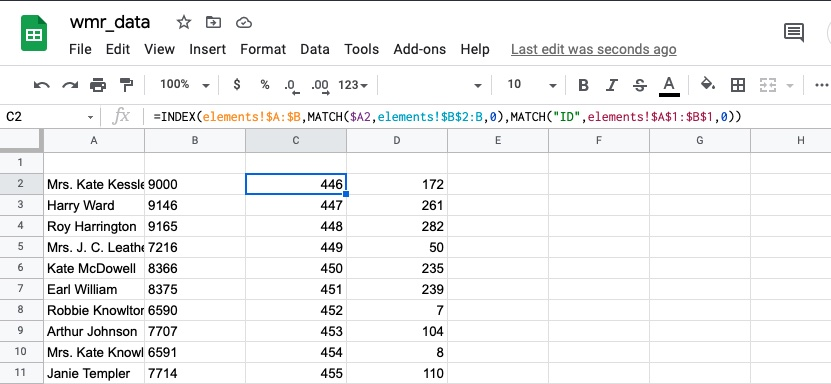

I selected everything in that sheet, then copied and pasted the values in place to make sure nothing could get changed inadvertently. With that done, I deleted columns A and B and labeled the remaining columns "From" and "To."

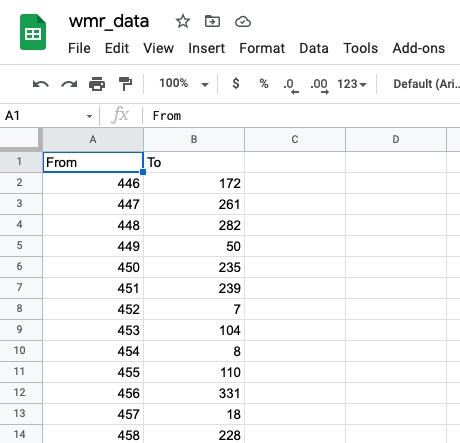

## 6 - Final touches before sending to Kumu
All Kumu really needs are the `elements` and `connections` sheets—indeed, all the other sheets will just confuse matters. We could delete those extra sheets, or we could just rename them, adding "(ignore)" to the sheet names. On the theory that I might want to do something else with these sheets at some point, I opted to go the latter route, and renamed all of the sheets.

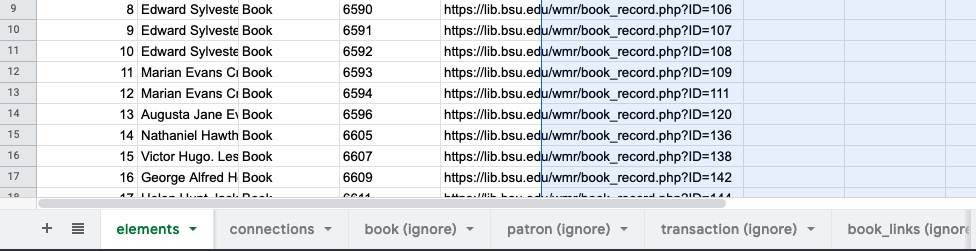

## Next Steps
We have everything we need now to visualize the network using the Kumu web service. If you want to visualize the network using Python code, instead, you can do that, too: you'd just need to download the `elements` and `connections` sheets from this Google Sheets file in .csv format